In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# Threshold to detect object
thres = 0.56

In [3]:
#Labels
classNames= []
classFile = 'coco.names.txt'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [9]:
#loading pre-trained model from disk
configPath = r'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt.txt'
weightsPath = r'frozen_inference_graph.pb'

In [10]:
#defining model
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

<dnn_Model 0000023FFCD7FE50>

In [11]:
image=r'image.png'
img = cv2.imread(image)

In [12]:
classIds, confs, bbox = net.detect(img,confThreshold=thres)
if len(classIds) != 0:
    for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
        # draw the bounding box on the image
        cv2.rectangle(img,box,color=(255,0,0),thickness=3)
        cv2.putText(img,classNames[classId-1].upper(),(box[0]+5,box[1]+30),
                    cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
        cv2.putText(img,str(round(confidence*100,2)),(box[0]+5,box[1]+55),
                    cv2.FONT_HERSHEY_COMPLEX,0.6,(255,0,0),2)

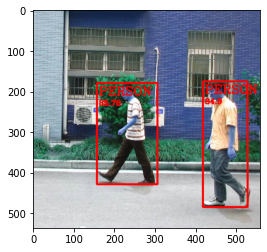

In [13]:
plt.imshow(img)

In [14]:
cap = cv2.VideoCapture(r'sample.mp4')
cap.set(3,1280)
cap.set(4,720)
cap.set(10,70)
while True:
    success,img = cap.read()
    classIds, confs, bbox = net.detect(img,confThreshold=thres)
    #print(classIds,bbox)
    
    if len(classIds) != 0:
        for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
            cv2.rectangle(img,box,(0,0,255),1)
            cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+30),
                        cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),1)

    cv2.imshow("Output Video",img)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        cv2.destroyAllWindows()
        break
#close all opencv windows open
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
